# <u>Preprocesamiento y revisión de variables</u>

## Funnel de Modelamiento


## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [2]:
seed = 2021

### 1. Lectura de base

In [3]:
data_creditos = pd.read_csv('data/loan_prediction.csv')

`head` `shape` `type`

In [4]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_creditos.shape

(614, 13)

Definimos 2 columnas relevantes, el id y el target, que en nuestro caso son las siguientes variables:

In [6]:
id_columns = 'Loan_ID'
target = 'Loan_Status'

La variable target es binaria de tipo texto, mejor lo cambiamos a numérico:

In [9]:
data_creditos[target].value_counts() 

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
data_creditos[target] = data_creditos[target].map({'Y': 0, 'N': 1})

In [11]:
data_creditos[target].value_counts()

Loan_Status
0    422
1    192
Name: count, dtype: int64

In [13]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


Veamos algunas características de nuestra variable target:

In [14]:
data_creditos[target].value_counts(normalize = True)

Loan_Status
0    0.687296
1    0.312704
Name: proportion, dtype: float64

In [15]:
data_creditos[target].mean()

0.3127035830618892

El id de la tabla no nos va a servir para el entrenamiento de datos, por lo que lo vamos a eliminar el id de los clientes antes de empezar con el tratamiento de datos:

In [16]:
data_creditos = data_creditos.drop(id_columns, axis = 1)

In [17]:
data_creditos.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


### 2.División en conjuntos de entrenamiento y prueba

En esta etapa realizaremos la división bases de entrenamiento (train) y prueba (test).

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
X = data_creditos.drop(target, axis =1)
y = data_creditos[target]

In [22]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [23]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [24]:
X.shape

(614, 11)

In [25]:
y.shape

(614,)

In [26]:
# función para dividir la base en piloto y control
from sklearn.model_selection import train_test_split

In [27]:
seed

2021

In [39]:
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [42]:
# usaremos la división train/test en 80/20. Otro ratio recomendable es 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

In [43]:
y_test.value_counts(normalize=True)

Loan_Status
0    0.691057
1    0.308943
Name: proportion, dtype: float64

In [44]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [45]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
33,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban
450,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural
168,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban
530,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural
169,Male,Yes,2,Graduate,No,8000,0.0,200.0,360.0,1.0,Semiurban


In [46]:
X_train.shape, X_test.shape

((491, 11), (123, 11))

In [47]:
y_train.shape, y_test.shape

((491,), (123,))

In [48]:
# validación de los promedios de la variable target
y.mean(), y_train.mean(), y_test.mean()

(0.3127035830618892, 0.3136456211812627, 0.3089430894308943)

In [49]:
y_train.value_counts()

Loan_Status
0    337
1    154
Name: count, dtype: int64

In [50]:
y_test.value_counts()

Loan_Status
0    85
1    38
Name: count, dtype: int64

### 3.Análisis exploratorio

Revisemos las columnas del conjunto de datos:

In [51]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [52]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [53]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 237 to 39
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         479 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      467 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         478 non-null    float64
 8   Loan_Amount_Term   479 non-null    float64
 9   Credit_History     453 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


Veamos los principales estadísticos:

In [55]:
X_train.describe()   # sólo para variables numéricas

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,478.000000,479.000000,453.000000
mean,5358.511202,1670.942811,146.129707,341.661795,0.843267
std,6069.036190,3155.227516,86.137888,64.750910,0.363951
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,5790.000000,2333.000000,166.750000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [56]:
X_train.describe()[1:3]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
mean,5358.511202,1670.942811,146.129707,341.661795,0.843267
std,6069.036190,3155.227516,86.137888,64.750910,0.363951


In [57]:
X_train.describe(include = 'object')   # para datos categoricos

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,479,489,479,491,467,491
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,387,318,276,380,399,185


Si observas variables con muchas categorías (cercana a la cantidad de registros) o 1 sola categoría, descartarlas.

In [58]:
X_train['Married'].value_counts(dropna = False)

Married
Yes    318
No     171
NaN      2
Name: count, dtype: int64

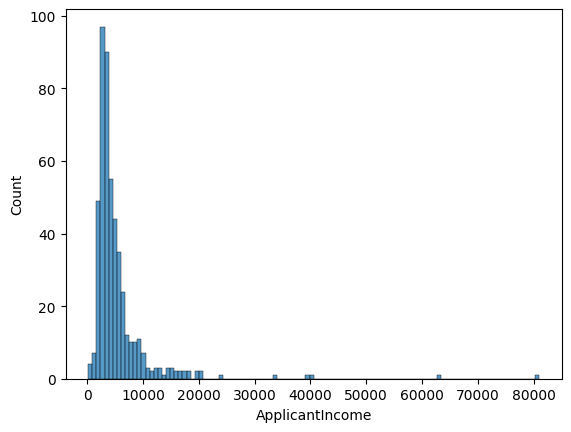

In [59]:
sns.histplot(data = X_train, x = 'ApplicantIncome')
plt.show()

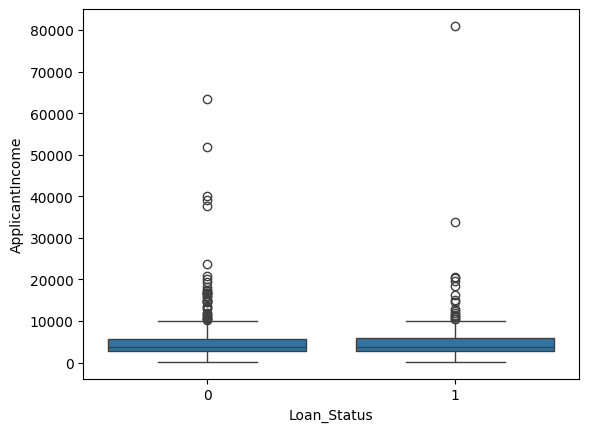

In [60]:
sns.boxplot(data = data_creditos, y = 'ApplicantIncome', x = target)
plt.show()

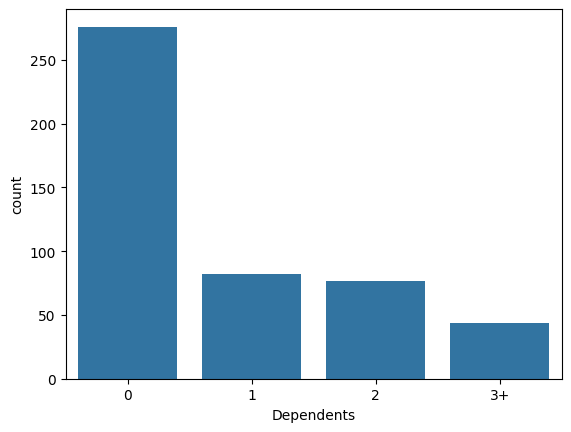

In [61]:
sns.countplot(data = X_train, x = 'Dependents')
plt.show()

In [65]:
X_train.loc[X_train['Dependents'] == '3+'].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban
338,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban
324,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban
481,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural


In [63]:
X_train[X_train["Dependents"] == '3+'].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban
338,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban
324,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban
481,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural


In [62]:
X_train.query("Dependents == '3+'").head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban
338,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban
324,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban
481,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural


### 4.Transformación de variables

In [66]:
X_train['Dependents'].value_counts(dropna = False)

Dependents
0      276
1       82
2       77
3+      44
NaN     12
Name: count, dtype: int64

In [67]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
X_train['Dependents'] = X_train['Dependents'].map(mapping)

In [68]:
X_train['Dependents'].value_counts(dropna = False)

Dependents
0.0    276
1.0     82
2.0     77
3.0     44
NaN     12
Name: count, dtype: int64

In [69]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0.0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0.0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0.0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [70]:
X_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,479.000000,491.000000,491.000000,478.000000,479.000000,453.000000
mean,0.768267,5358.511202,1670.942811,146.129707,341.661795,0.843267
std,1.026100,6069.036190,3155.227516,86.137888,64.750910,0.363951
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,2.000000,5790.000000,2333.000000,166.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 237 to 39
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         479 non-null    float64
 3   Education          491 non-null    object 
 4   Self_Employed      467 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         478 non-null    float64
 8   Loan_Amount_Term   479 non-null    float64
 9   Credit_History     453 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 62.2+ KB


### 5.Tratamiento de valores nulos

<img src = 'https://miro.medium.com/max/2816/1*MiJ_HpTbZECYjjF1qepNNQ.png'>

Cantidad de valores nulos por columna

Missigno: https://github.com/ResidentMario/missingno

In [ ]:
X_train.head()

In [72]:
# instalar missingno
!pip install missingno

In [73]:
import missingno as msno

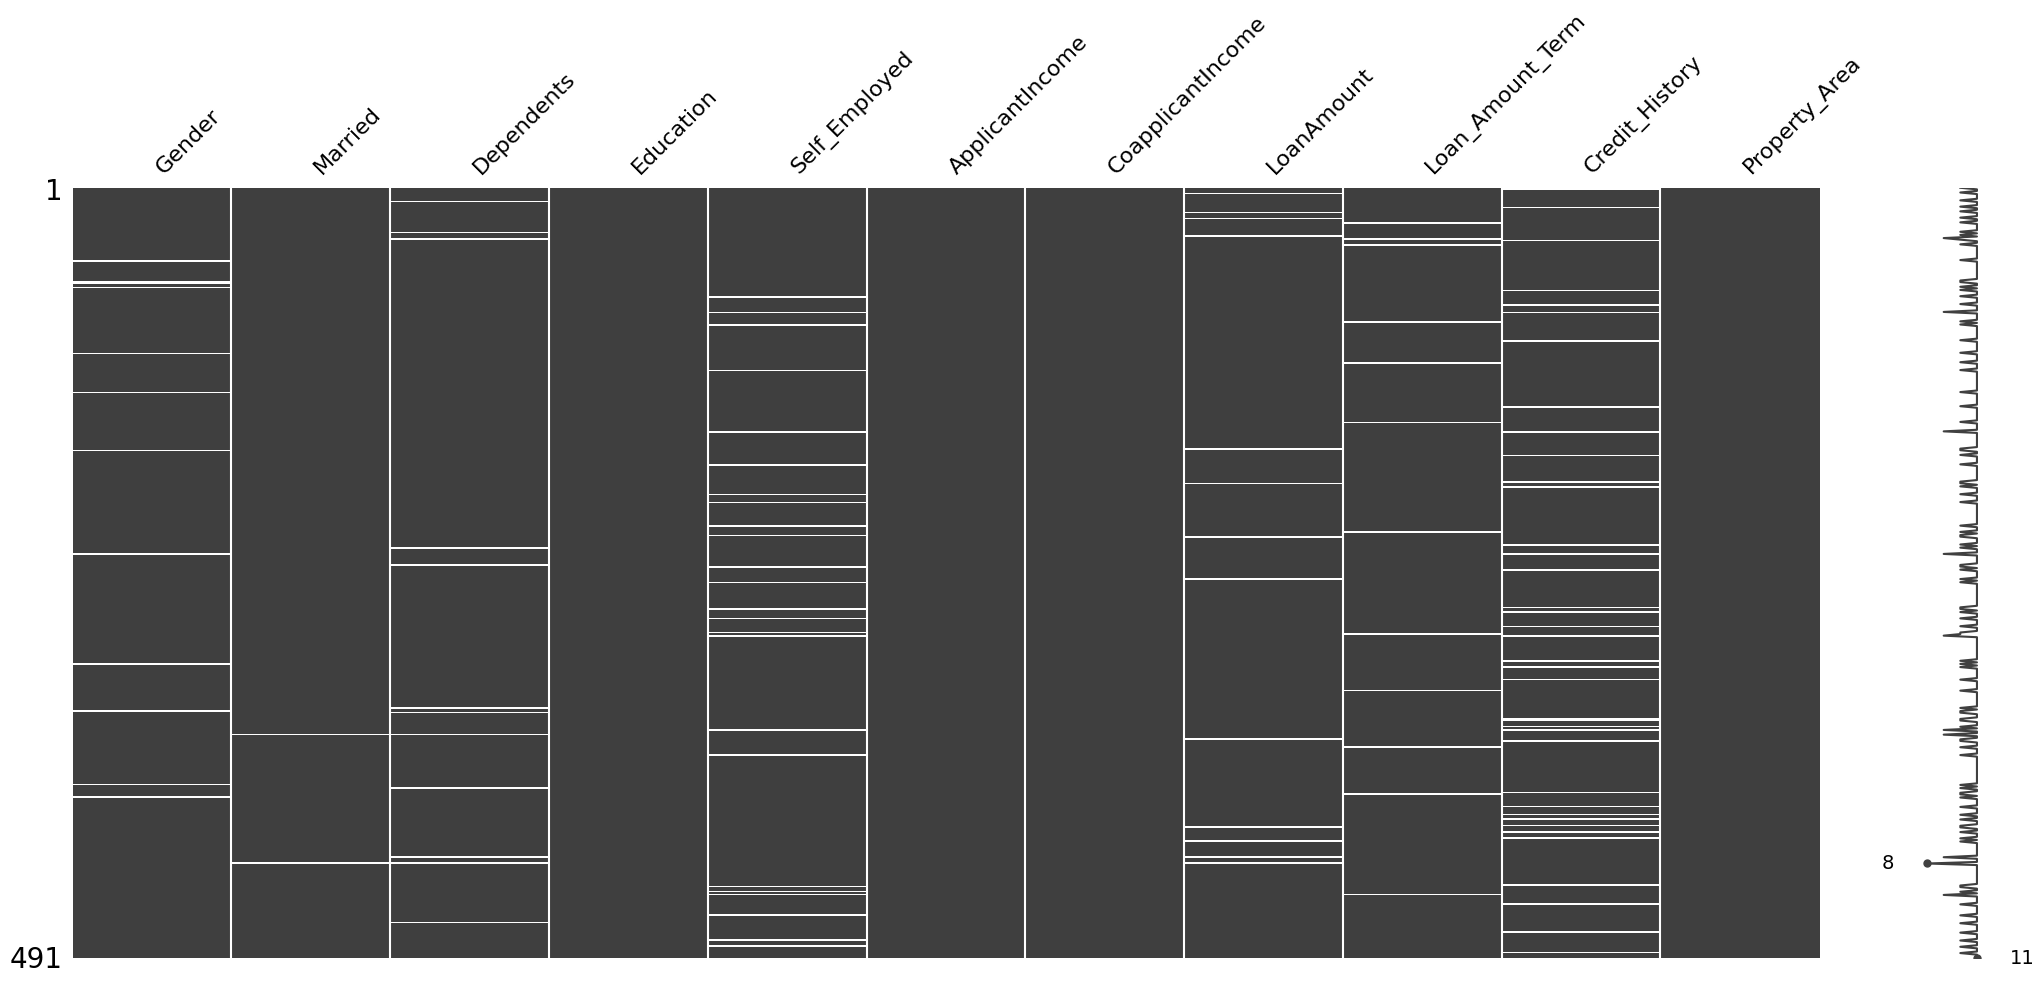

In [74]:
msno.matrix(X_train)
plt.show()

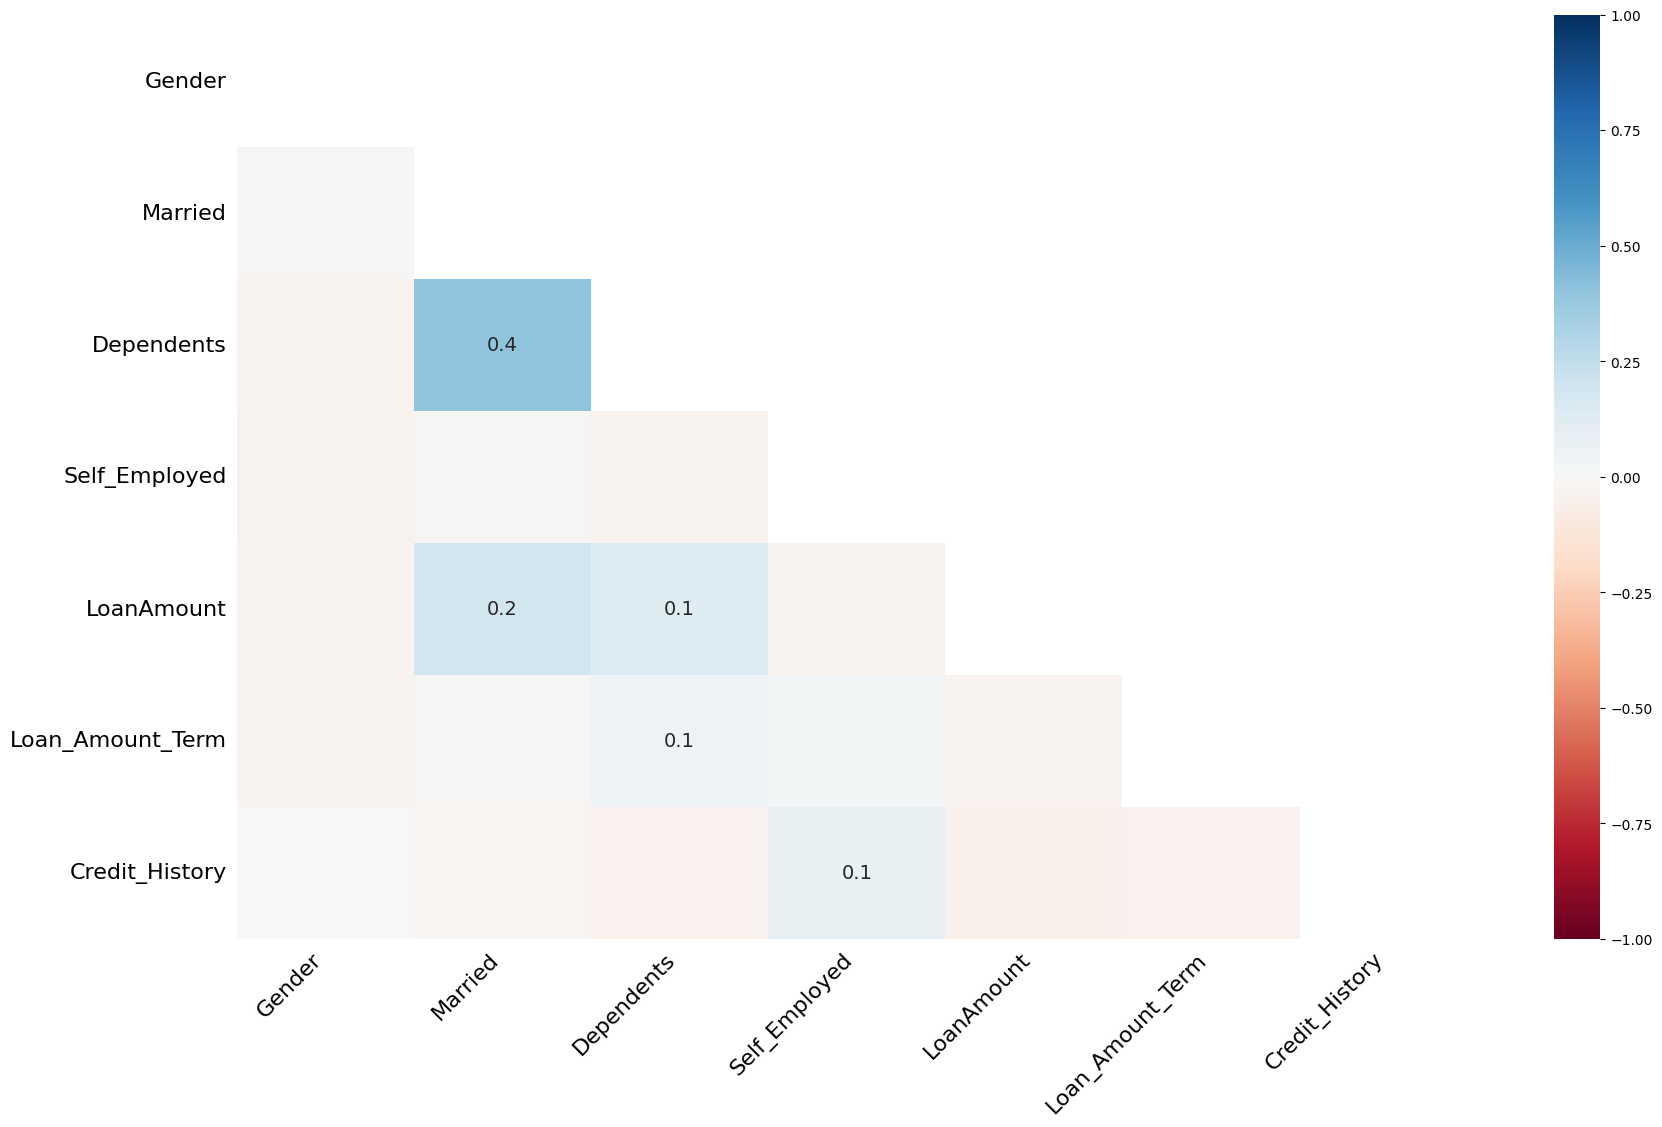

In [75]:
msno.heatmap(X_train)
plt.show()

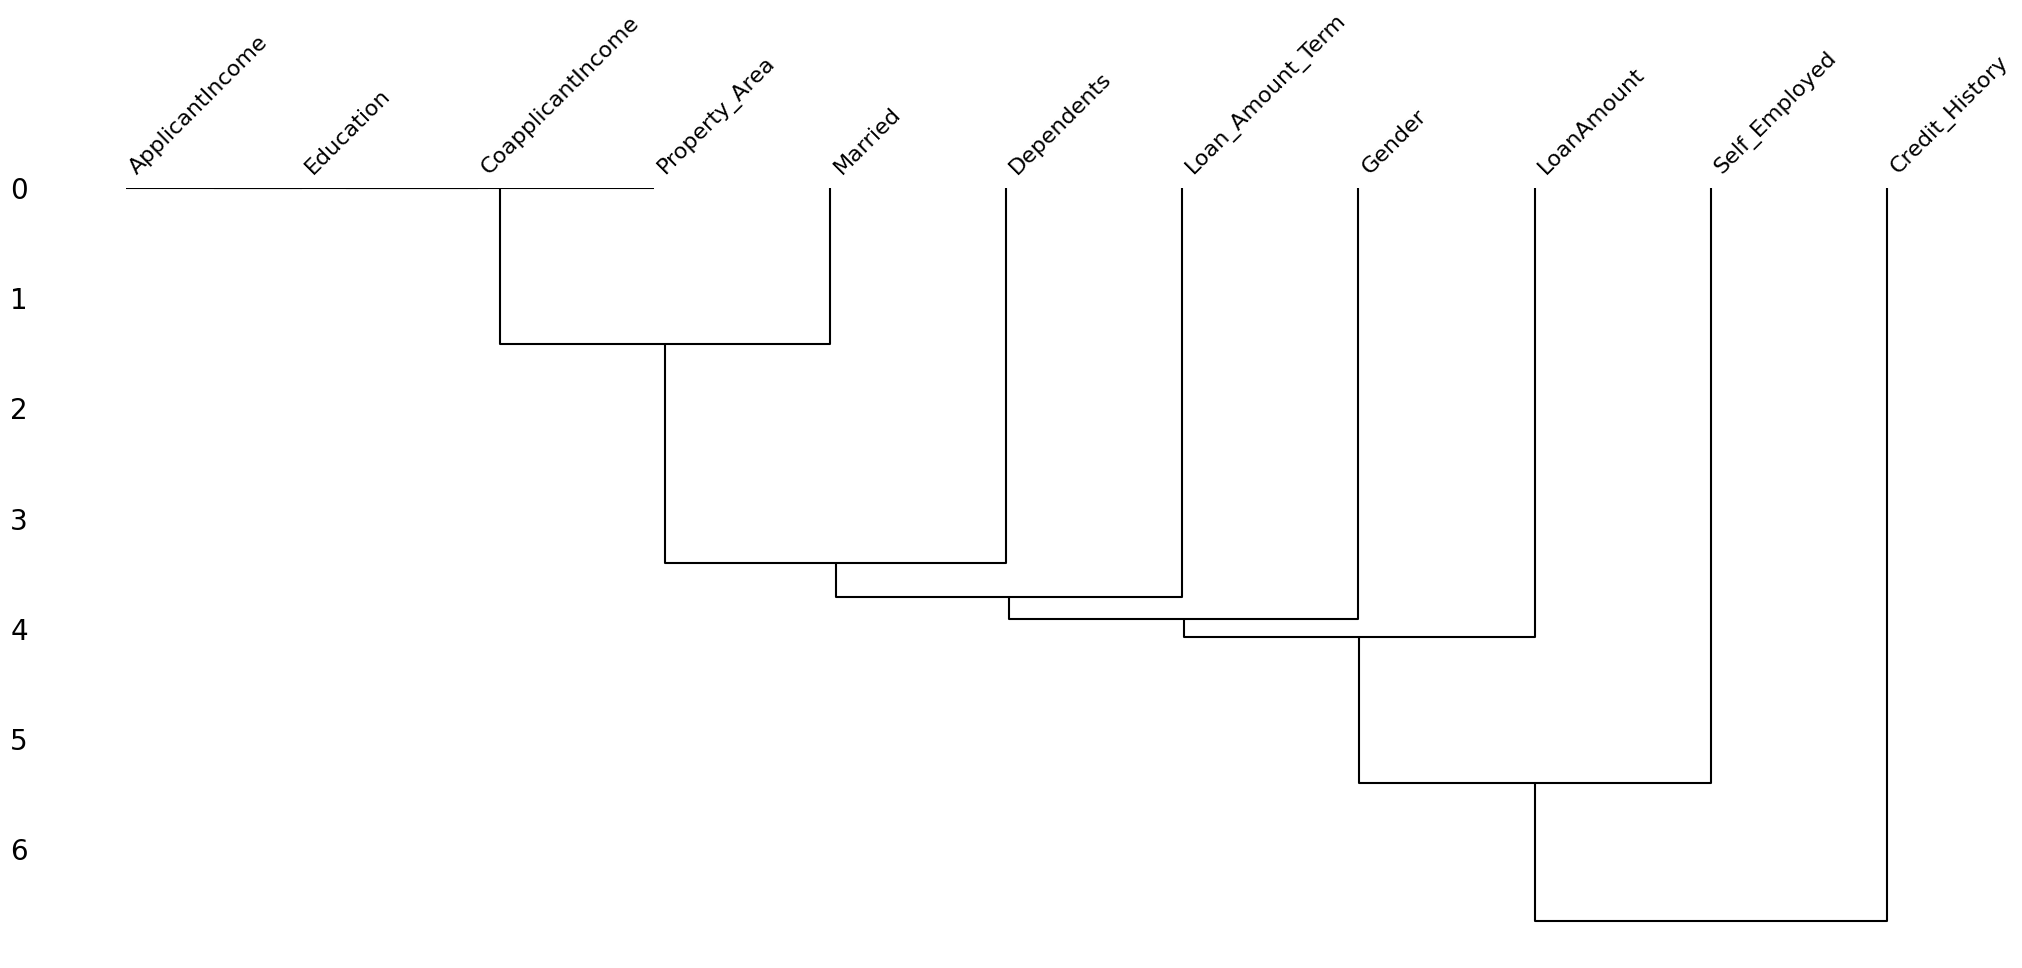

In [76]:
msno.dendrogram(X_train)
plt.show()

In [77]:
X_train.isnull().sum()

Gender               12
Married               2
Dependents           12
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           13
Loan_Amount_Term     12
Credit_History       38
Property_Area         0
dtype: int64

In [78]:
# punto de guardado de bases avanzadas

X_train.to_csv('train_101122.csv', index = False)
X_test.to_csv('test_101122.csv', index = False)

y_train.to_csv('ytrain_101122.csv', index = False)
y_test.to_csv('ytest_101122.csv', index = False)

In [79]:
# extrayendo la data guardada
import pandas as pd

X_train = pd.read_csv('train_101122.csv')
X_test = pd.read_csv('test_101122.csv')

y_train = pd.read_csv('ytrain_101122.csv')
y_test = pd.read_csv('ytest_101122.csv')

El método de imputación depende de la naturaleza de la variable. Separamos las variables categóricas de las numéricas

In [80]:
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')

In [81]:
X_train_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Female,No,Graduate,Yes,Urban
1,Male,Yes,Not Graduate,No,Urban
2,Male,Yes,Graduate,Yes,Semiurban
3,Male,No,Graduate,No,Urban
4,Male,No,Not Graduate,No,Semiurban


In [82]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463,0.0,122.0,360.0,NaN
1,0.0,1800,2934.0,93.0,360.0,0.0
2,1.0,2895,0.0,95.0,360.0,1.0
3,0.0,5849,0.0,NaN,360.0,1.0
4,0.0,2927,2405.0,111.0,360.0,1.0


Simple Imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

#### Imputación de numéricas

<Axes: ylabel='Frequency'>

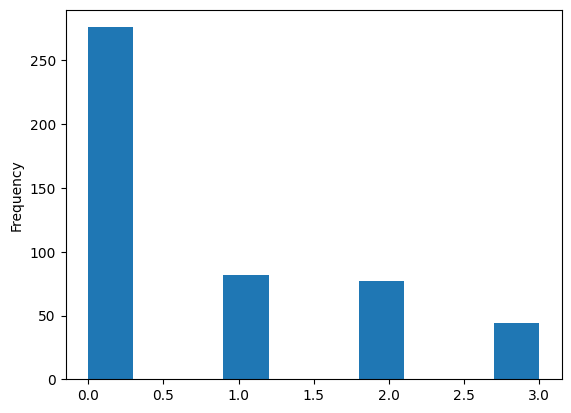

In [90]:
X_train['Dependents'].plot(kind='hist')

In [89]:
X_train['Dependents'].isnull().sum() / len(X_train)

0.024439918533604887

In [87]:
X_train['Dependents'].mean()

0.7682672233820459

In [88]:
X_train['Dependents'].median()

0.0

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463,0.0,122.0,360.0,NaN
1,0.0,1800,2934.0,93.0,360.0,0.0
2,1.0,2895,0.0,95.0,360.0,1.0
3,0.0,5849,0.0,NaN,360.0,1.0
4,0.0,2927,2405.0,111.0,360.0,1.0


In [93]:
imputer_num = SimpleImputer(strategy = 'median')

In [94]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

`IMPUTER.statistics_`

In [ ]:
imputer_num.statistics_

In [ ]:
imputer_num.transform(X_train_num)

In [ ]:
X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns = X_train_num.columns)

In [ ]:
X_train_num.head()

In [ ]:
X_train_num_imputed.head()

In [ ]:
X_train_num.isnull().sum()

In [ ]:
X_train_num_imputed.isnull().sum()

#### Imputación de categóricas

In [ ]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

X_train_cat_imputed.head()

In [ ]:
imputer_cat.statistics_

In [ ]:
X_train_cat.isnull().sum()

In [ ]:
X_train_cat_imputed.isnull().sum()

Ya no tenemos valores nulos!

#### Utilizar el módulo sklearn.impute para llenar valores nulos (KNNImputer)

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)

In [ ]:
# TODO: imputar las variables numéricas con KNN Imputer - interpretar los resultados

knn.fit_transform(X_train_num)

In [ ]:
X_train_num_imputed2 = pd.DataFrame(data = knn.fit_transform(X_train_num), columns = X_train_num.columns)

In [ ]:
X_train_num_imputed2.head()

### 6.Encoding de variables categóricas

In [ ]:
X_train_cat_imputed.describe()

In [ ]:
X_train_cat_imputed.head(10)

In [ ]:
X_train_cat_imputed[['Property_Area']].head(10)

`get_dummies` de Pandas nos permite crear variables dummies

In [ ]:
pd.get_dummies(X_train_cat_imputed[['Property_Area']], drop_first = True)

In [ ]:
pd.get_dummies(X_train_cat_imputed[['Property_Area']], drop_first = False)

In [ ]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True)

In [ ]:
X_train_cat_imputed.head()

In [ ]:
X_train_cat_dummies.head()

Otra alternativa para generar los dummies

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(X_train_cat_imputed)

In [ ]:
ohe.categories_

In [ ]:
list(ohe.categories_[0])

In [ ]:
ohe.transform(X_train_cat_imputed).toarray()

In [ ]:
columnas = list(ohe.categories_[0])+list(ohe.categories_[1])+list(ohe.categories_[2])+list(ohe.categories_[3])+list(ohe.categories_[4])

In [ ]:
columnas

In [ ]:
X_train_cat_dummies2 = pd.DataFrame(data = ohe.transform(X_train_cat_imputed).toarray(), columns = columnas)

In [ ]:
X_train_cat_dummies2.head()

### 7.Tratamiento de valores extremos

<img src= 'https://miro.medium.com/max/1352/1*xsJKdRtENPJn4WWx604LGQ.png'>

In [ ]:
X_train_num_imputed.head()

In [ ]:
X_train_num_imputed.describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'LoanAmount')
plt.show()

In [ ]:
X_train_num_imputed.describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75])

In [ ]:
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

**Variable `ApplicantIncome`**

In [ ]:
import numpy as np

p1 = np.percentile(X_train_num_imputed['ApplicantIncome'], 1)
p99 = np.percentile(X_train_num_imputed['ApplicantIncome'], 99)

In [ ]:
p1, p99

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

`np.clip` limita los bordes del intervalo a unos valores dados

In [ ]:
X_train_num_imputed['ApplicantIncome'] = np.clip(X_train_num_imputed['ApplicantIncome'], p1, p99)

Veamos los cambios en la distribución:

In [ ]:
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

In [ ]:
# aplicación de la transformada logaritmo (para normalizar variables)
# para poder reducir los valores de una variable con valores muy grandes
sns.histplot(np.log(X_train_num_imputed['ApplicantIncome']))
plt.show()

### 8. Consolidación

In [ ]:
X_train_cat_dummies.head()

In [ ]:
X_train_num_imputed.head()

In [ ]:
X_train_cat_dummies.shape

In [ ]:
X_train_num_imputed.shape

`pd.concat` nos permite concatenar las bases anteriormente revisadas:

In [ ]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)
X_train_total.head()

Hagamos una última verificación de nulos

In [ ]:
X_train_total.isnull().sum()

### 9. Creación de nuevas variables

<img src = 'https://i.pinimg.com/originals/89/0f/92/890f92f1dba99065531aa2bc1b6b9c45.jpg'>

In [ ]:
X_train_total.head()

In [ ]:
X_train_total['TotalIncome'] = X_train_total['ApplicantIncome'] + X_train_total['CoapplicantIncome']

In [ ]:
X_train_total.head()

In [ ]:
X_train_total['TotalIncomeByPerson'] = X_train_total['TotalIncome'] / (X_train_total['Dependents'] + 1)

In [ ]:
X_train_total.head()

In [ ]:
X_train_total['Cuota'] = X_train_total['LoanAmount'] * 1000 / X_train_total['Loan_Amount_Term']
X_train_total['%Cuota'] = X_train_total['Cuota'] / X_train_total['TotalIncome']  # nivel de endeudamiento

In [ ]:
X_train_total.head()

In [ ]:
sns.histplot(data = X_train_total, x = 'ApplicantIncome')
plt.show()

In [ ]:
X_train_total['log_ApplicantIncome'] = np.log(X_train_total['ApplicantIncome'])
X_train_total['log_TotalIncome'] = np.log(X_train_total['TotalIncome'])

In [ ]:
sns.histplot(data = X_train_total, x = 'log_TotalIncome')
plt.show()

### 10.Estandarización

Esto es importante para variables con diferencias en escala, y siempre tiene que aplicarse en ML no supervisado

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X_train_total)

In [ ]:
columnas = X_train_total.columns
columnas

In [ ]:
X_train_scaled = pd.DataFrame(data = X_scaled, columns = columnas)

X_train_scaled

Comparación de distribuciones

In [ ]:
sns.histplot(X_train_total['ApplicantIncome'])
plt.show()

In [ ]:
sns.histplot(X_train_scaled['ApplicantIncome'])
plt.show()

## Repetir todo el preprocesamiento para el conjunto de validación

In [ ]:
X_test.head()

In [ ]:
X_test.info()

Variable de dependientes

In [ ]:
X_test['Dependents'] = X_test['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

Imputación de nulos

In [ ]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

Numéricas

In [ ]:
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test_num), columns = X_test_num.columns)
X_test_num_imputed.head()

Categóricas

In [ ]:
X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test_cat), columns = X_test_cat.columns)
X_test_cat_imputed.head()

Encoding

In [ ]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

Capeo de valores atípicos (con los obtenidos del train)

In [ ]:
X_test_num_imputed['ApplicantIncome'] = np.clip(X_test_num_imputed['ApplicantIncome'], p1, p99)

Consolidación

In [ ]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [ ]:
X_test_total['TotalIncome'] = X_test_total['ApplicantIncome'] + X_test_total['CoapplicantIncome']
X_test_total['TotalIncomeByPerson'] = X_test_total['TotalIncome'] / (X_test_total['Dependents'] + 1)
X_test_total['Cuota'] = X_test_total['LoanAmount']*1000 / X_test_total['Loan_Amount_Term']
X_test_total['%Cuota'] = X_test_total['Cuota'] / X_test_total['TotalIncome']

In [ ]:
X_test_total['log_ApplicantIncome'] = np.log(X_test_total['ApplicantIncome'])
X_test_total['log_TotalIncome'] = np.log(X_test_total['TotalIncome'])

In [ ]:
X_test_scaled = pd.DataFrame(data = scaler.fit_transform(X_test_total), columns = X_test_total.columns)

Verificamos que ambas tengan la misma cantidad de columnas

In [ ]:
X_train_scaled.shape

In [ ]:
X_test_scaled.shape

Guardamos ambos datasets preprocesados

In [ ]:
target = 'Loan_Status'

X_train_export = X_train_scaled.copy()
X_train_export[target] = y_train.values

X_test_export = X_test_scaled.copy()
X_test_export[target] = y_test.values

In [ ]:
X_train_export.head()

In [ ]:
X_test_export.head()

In [ ]:
X_train_export.to_csv('train_preprocesed.csv', index = False)
X_test_export.to_csv('test_preprocesed.csv', index = False)

Cargamos de nuevo las bases para continuar:

In [ ]:
import pandas as pd
import numpy as np

X_train_export = pd.read_csv('train_preprocesed.csv')
X_test_export = pd.read_csv('test_preprocesed.csv')

target = 'Loan_Status'

In [ ]:
X_train_scaled = X_train_export.drop(target, axis = 1)  # para borrar columnas
y_train = X_train_export[target]

In [ ]:
X_test_scaled = X_test_export.drop(target, axis = 1)  # para borrar columnas
y_test = X_test_export[target]

## Balanceo de clases

Todo balanceo se realiza solo sobre la data de entrenamiento

In [ ]:
# target original en la base train
y_train.mean()    #considerar las técnicas de balanceo cuando el target original es menor a 5%

In [ ]:
# cantidad de registros de la base
X_train_scaled.shape

In [ ]:
y_train.value_counts()

***Undersampling y oversampling***

In [ ]:
#!pip install --user imblearn

In [ ]:
# si hay problemas para importar lalibería imblearn, se debe a la nueva versión 1.3.0 de sklearn, 
# debemos realizar un downgrade de dicha librería

import sklearn as s
s.__version__

In [ ]:
#hacerlo en powershell prompt

#pip uninstall scikit-learn
#pip install scikit-learn==1.2.2

In [ ]:
import imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Submuestreo: Seleccionamos todo el target y un número menor de observaciones no target

rus = RandomUnderSampler(sampling_strategy =1, random_state = 2022)

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [ ]:
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
X_rus.shape

In [ ]:
y_rus.mean()

In [ ]:
y_rus.value_counts()

In [ ]:
# Sobremuestreo: Ampliamos el número de observaciones target mediante remuestreo

rov = RandomOverSampler(sampling_strategy = 1, random_state = 2022)

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [ ]:
X_rov, y_rov = rov.fit_resample(X_train_scaled, y_train)

In [ ]:
X_rov.shape

In [ ]:
y_rov.mean()

In [ ]:
y_rov.value_counts()

***Exportar conjuntos de datos balanceados***

In [ ]:
X_train_export_rus = X_rus.copy()
X_train_export_rus[target] = y_rus.values

In [ ]:
X_train_export_rus.to_csv('train_preprocesed_rus.csv', index = False)

In [ ]:
X_train_export_rov = X_rov.copy()
X_train_export_rov[target] = y_rov.values

In [ ]:
X_train_export_rov.to_csv('train_preprocesed_rov.csv', index = False)

***Smote***

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#smote crea nuevos "unos" que se parezcan a los originales mediante vecinos cercanos (KNN)

smote = SMOTE(sampling_strategy = 1, random_state = 2022)

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [ ]:
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
y_smote.mean()

In [ ]:
y_smote.value_counts()

***Smote + Tomek***

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smotetomek = SMOTETomek(sampling_strategy = 1, random_state = 2022)

In [ ]:
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

In [ ]:
y_smotetomek.mean()

In [ ]:
y_smotetomek.value_counts()

***Exportar conjuntos de datos balanceados***

In [ ]:
X_train_smotetomek = X_smotetomek.copy()
X_train_smotetomek[target] = y_smotetomek.values

In [ ]:
X_train_smotetomek.to_csv('train_preprocesed_smotetomek.csv', index = False)

## Técnicas adicionales de creación de variables

In [ ]:
X_train_scaled.head()

# no puede existir valores nulos (NaN) ni variables con valores muy grandes

### a. Creación de variables polinómicas y de interacciones

In [ ]:
# Creamos las variables polinomicas y de interacciones!

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias= False)
crossed_feats = poly.fit_transform(X_train_scaled.values)

In [ ]:
##### ponerle el nombre a las nuevas variables polinomiales

crossed_feats

In [ ]:
poly.get_feature_names_out(X_train_scaled.columns)

In [ ]:
# Convertimos el array en dataframe!
X_train_num_imputed2 = pd.DataFrame(crossed_feats, columns = poly.get_feature_names_out(X_train_scaled.columns))

In [ ]:
X_train_num_imputed2.head()

In [ ]:
X_train_num_imputed2.shape

### b. Creación de variables a partir del Análisis de Componentes Principales (PCA)

Es una técnica estadística de síntesis de la información o reducción de la dimensión (número de variables) El objetivo será reducirlas a un menor número perdiendo la menor cantidad de información posible.

Los nuevos componentes principales o factores serán una combinación lineal de las variables originales, y además serán **independientes entre sí**

In [ ]:
# Aplicamos la metodologia de ACP!
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train_scaled)

In [ ]:
#variacion explicada por las componentes
print(pca.explained_variance_ratio_)

In [ ]:
print(pca.components_)

In [ ]:
# Creamos los componentes!
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA_1', 'PCA_2'])

In [ ]:
# Revisamos las nuevas variables!
principalDf.head()

In [ ]:
# Le agregamos las variables al set de datos!
X_train_num_imputed3 = pd.concat([X_train_num_imputed2,principalDf], axis=1)

In [ ]:
X_train_num_imputed3.shape

In [ ]:
X_train_num_imputed3.head()

### c. Creación de variables a partir de WOEs (dependen del target binario)

In [ ]:
X_train_export.shape

In [ ]:
#!pip install scorecardpy

In [ ]:
# Filtrar las variables más relevantes por IV!

import scorecardpy as sc
desarrll_subset_woe = sc.var_filter(X_train_export, y = target)

In [ ]:
desarrll_subset_woe.head()

In [ ]:
# Creamos los cortes a traves de WOES
bins = sc.woebin(desarrll_subset_woe, y=target)

In [ ]:
bins

In [ ]:
import matplotlib.pyplot as plt

# Revisamos las relaciones bivariadas y damos los insigths accionables a los negocios!
sc.woebin_plot(bins)
plt.show()

In [ ]:
# binning adjustment
##  adjust breaks interactively
breaks_adj = sc.woebin_adj(desarrll_subset_woe, target, bins) 

In [ ]:
breaks_adj

In [ ]:
bins_adj = sc.woebin(desarrll_subset_woe, y=target, breaks_list=breaks_adj)

In [ ]:
train_woe = sc.woebin_ply(desarrll_subset_woe, bins_adj)

In [ ]:
train_woe.head()

In [ ]:
# agregando las variables woe creadas a la base general

X_train_total_woe = pd.concat([X_train_num_imputed3, train_woe], axis = 1)
X_train_total_woe.head()

In [ ]:
X_train_scaled.shape

In [ ]:
X_train_total_woe.shape

## Selección inicial de variables

Después del análisis univariado, eliminando variables con muchos nulos y con valores constantes, podemos usar los siguientes códigos para seleccionar variables con los métodos de la correlación de Pearson y el coeficiente de Chi-cuadrado:

In [ ]:
# Definimos el nombre de las variables y el número óptimo que buscamos!
feature_name = list(X_train_total_woe.columns)
# no of maximum features we need to select
num_feats=10

In [ ]:
X_train_total_woe

In [ ]:
k = X_train_total_woe.drop(columns = target)

In [ ]:
type(k)

In [ ]:
X_train_total_woe

In [ ]:
y_train

In [ ]:
# Correlacion de Pearson!   Recomendado para target numéricos
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature, cor_list
    
cor_support, cor_feature, cor_list = cor_selector(X_train_total_woe.drop(columns = target), y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

In [ ]:
cor_feature[0:num_feats]

In [ ]:
cor_list.sort(reverse=True)
cor_list[0:num_feats]

In [ ]:
# Metodo de Chi-2 de Inpdependencia!    Recomendado para target binarias y categóricas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

num_feats=10

X_norm = MinMaxScaler().fit_transform(X_train_total_woe.drop(columns = target))
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train_total_woe.drop(columns = target).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

In [ ]:
dir(chi_selector)

In [ ]:
chi_selector.pvalues_[0:num_feats]

In [ ]:
chi_feature

Más sobre la función SelectKbest:

https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html